In [26]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")


from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

ModuleNotFoundError: No module named 'distutils'

In [2]:
# Read Dataset
df = pd.read_csv(r'./dataset/Marketing_data.csv')

<h2>Explore Dataset</h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**CUSTID**: Identification of Credit Card holder<br> 
**BALANCE**: Balance amount left in customer's account to make purchases<br>
**BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
**PURCHASES**: Amount of purchases made from account<br>
**ONEOFFPURCHASES**: Maximum purchase amount done in one-go<br>
**INSTALLMENTS_PURCHASES**: Amount of purchase done in installment<br>
**CASH_ADVANCE**: Cash in advance given by the user<br>
**PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
**ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
**PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
**CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance being paid<br>
**CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advance"<br>
**PURCHASES_TRX**: Number of purchase transactions made<br>
**CREDIT_LIMIT**: Limit of Credit Card for user<br>
**PAYMENTS**: Amount of Payment done by user<br>
**MINIMUM_PAYMENTS**: Minimum amount of payments made by user  <br>
**PRC_FULL_PAYMENT**: Percent of full payment paid by user<br>
**TENURE**: Tenure of credit card service for user

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mean balance is $1564 <br>
Balance frequency is frequently updated on average ~0.9<br>
Purchases average is $1000<br>
one off purchase average is ~$600<br>
Average purchases frequency is around 0.5<br>
average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low<br>
Average credit limit ~ 4500<br>
Percent of full payment is 15%<br>
Average tenure is 11 years

In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# replace the missing values with the mean for the respective feature
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [7]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# dropping customer ID
df.drop(columns=['CUST_ID'], axis=1, inplace=True)

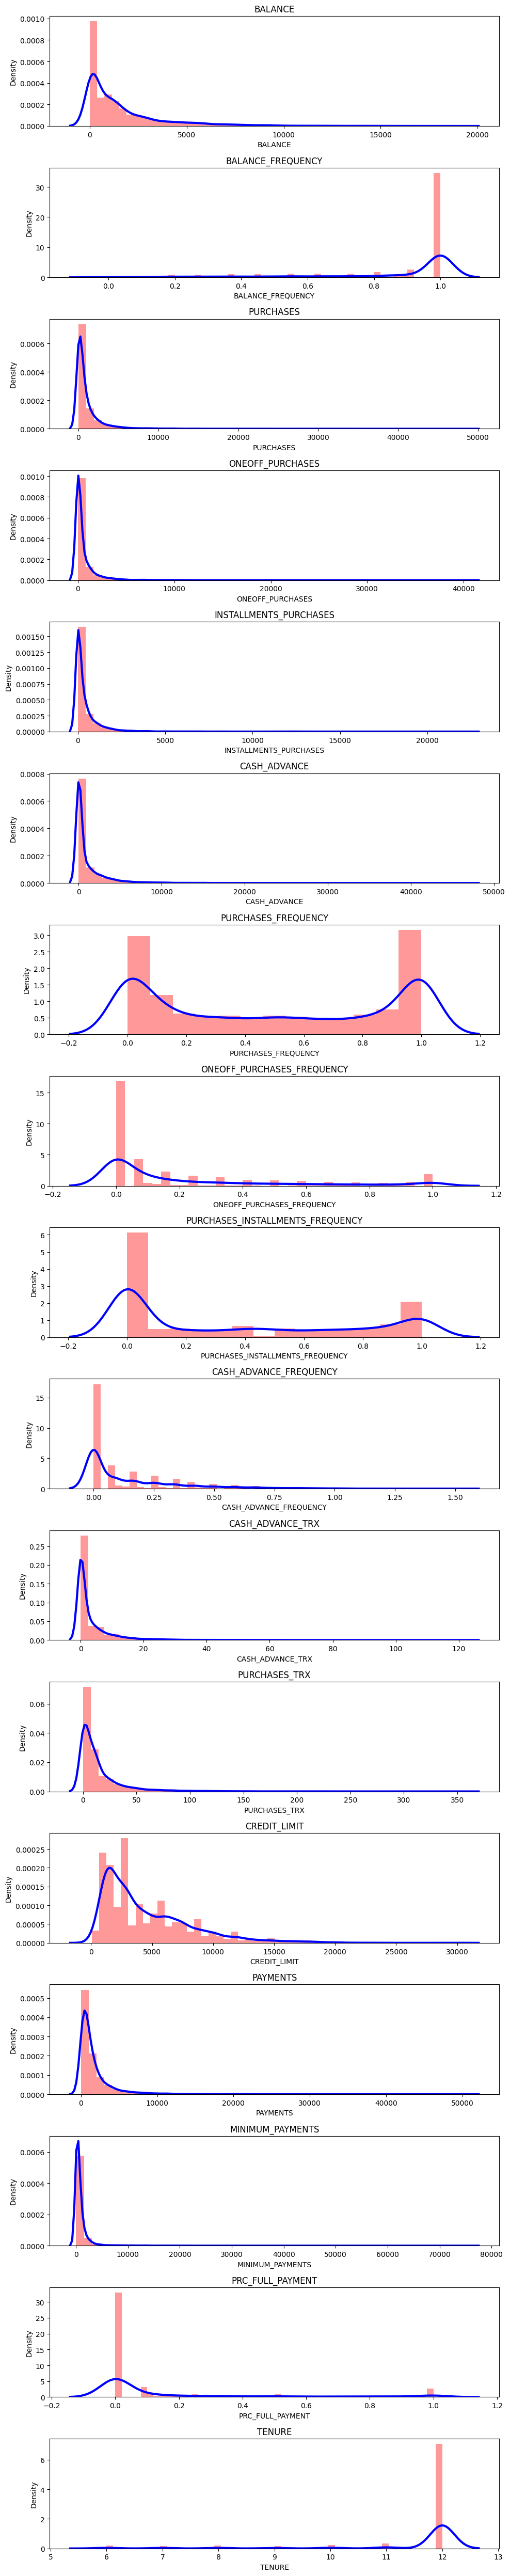

In [9]:
# features visualization
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "r"})
  plt.title(df.columns[i])

plt.tight_layout()

<Axes: >

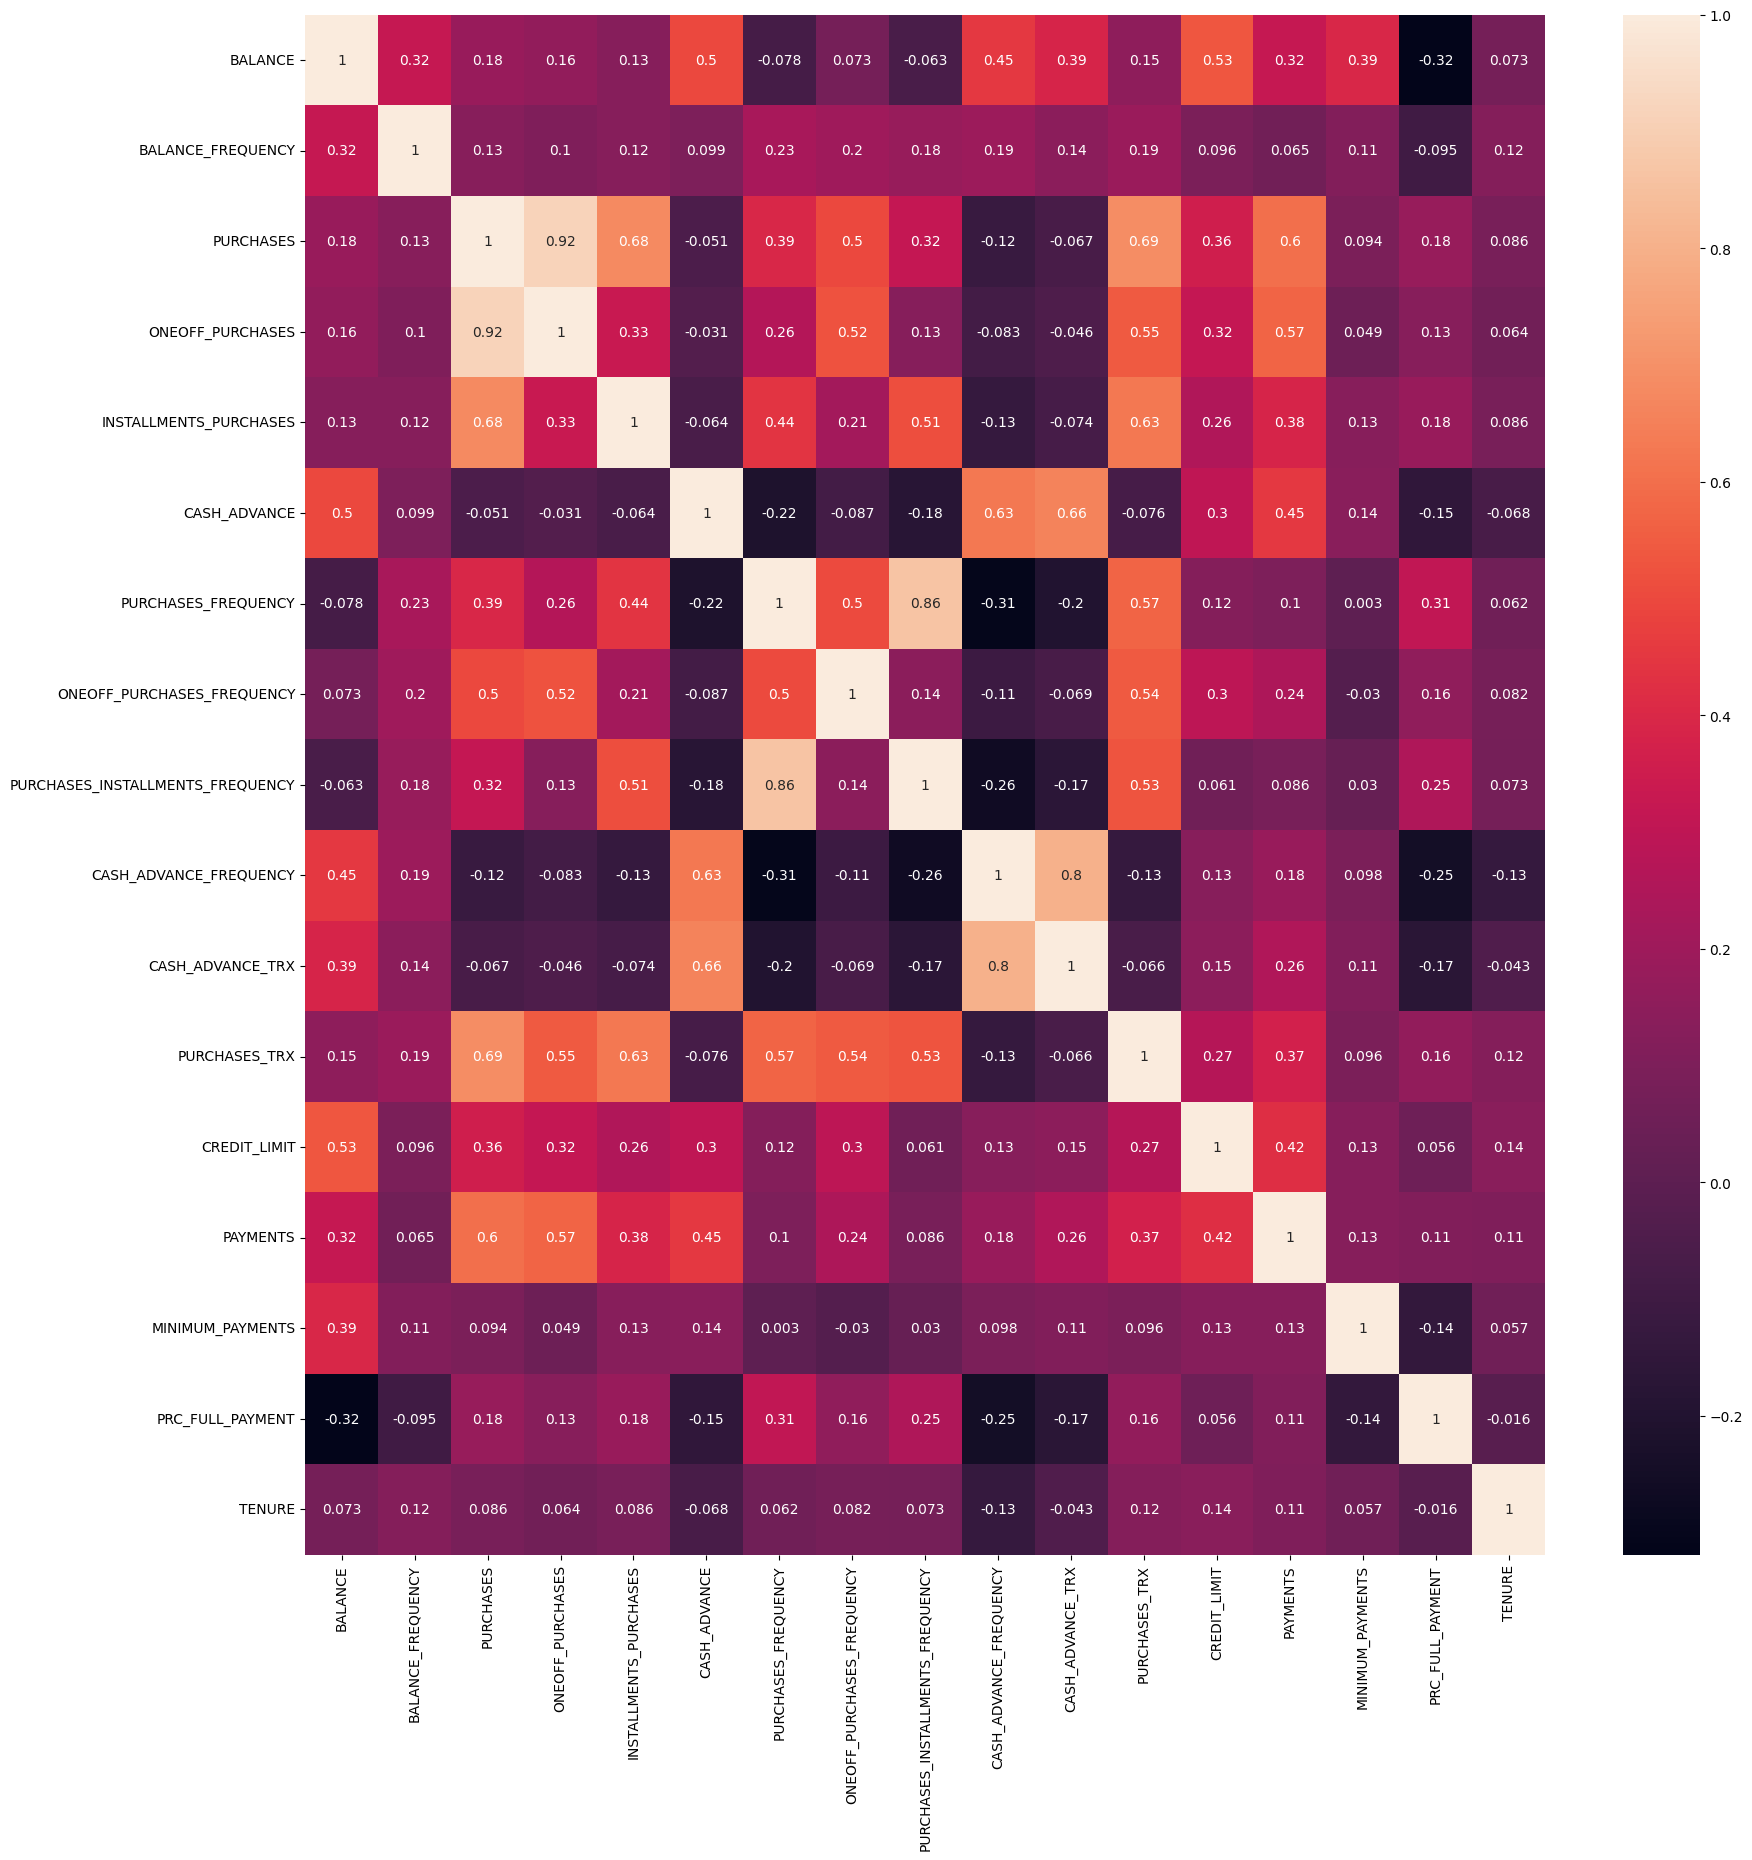

In [10]:
# correlations map
df_corr = df.corr()

fig, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df_corr, annot = True)

'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.<br>
Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

<h1>K-Means Algorithm</h1>

In [11]:
scaler = StandardScaler()

In [12]:
df_scaled = scaler.fit_transform(df)

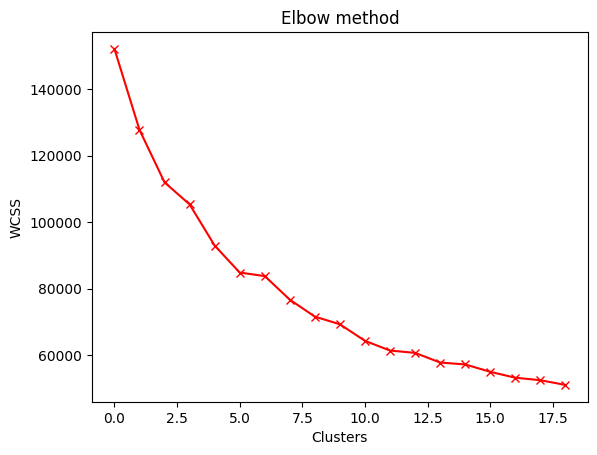

In [13]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'rx-')
plt.title('Elbow method')
plt.xlabel('Clusters')
plt.ylabel('WCSS') 
plt.show()

From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
However, the values does not reduce linearly until 9th cluster. 
Let's choose the number of clusters to be 8.

In [14]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [15]:
kmeans.cluster_centers_.shape

(8, 17)

In [16]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3004.548581,0.988548,5451.578022,3495.734664,1956.932287,536.941043,0.956019,0.730865,0.791159,0.072593,1.709619,76.128857,8728.675136,5070.015530,1286.258016,0.235993,11.931034
1,1398.009201,0.961821,218.190765,184.771759,33.598506,854.094415,0.127446,0.081377,0.045055,0.171084,3.257889,2.284004,3109.364043,958.354728,615.548211,0.023098,11.467900
2,1120.943166,0.967646,1069.122858,516.008029,553.579291,297.129324,0.860047,0.279357,0.685061,0.059632,1.124081,20.207090,3719.798067,1209.284733,691.249546,0.058356,11.649805
3,114.638800,0.356727,305.100652,190.126642,115.218894,351.472642,0.254345,0.067402,0.178858,0.039214,0.816007,3.837459,3624.347272,1085.613734,276.842657,0.175402,11.312706
4,3981.301792,0.958809,620.220819,410.708880,209.570000,5924.641825,0.329496,0.176622,0.210239,0.615288,20.541806,9.428094,7098.327759,4672.177145,1414.520973,0.057001,11.185619
5,120.944417,0.898979,1204.906915,536.477157,668.549698,41.110280,0.851298,0.279747,0.657649,0.007161,0.125000,19.107863,4694.354380,1312.955833,177.129542,0.792541,11.390121
6,5817.132503,0.952525,26182.492593,19534.091481,6648.401111,1504.881705,0.900617,0.767284,0.730247,0.055556,2.296296,138.074074,16096.296296,26162.301537,3777.160716,0.454405,11.925926
7,6205.380791,0.987500,515.123320,275.158300,240.098920,2745.419312,0.294206,0.106485,0.204842,0.271723,6.188000,7.396000,9021.009091,2320.478479,4541.762164,0.003827,11.844000


**First Customers cluster (Transactors)**: Those are customers who pay least amount of intrerest charges and are careful with their money, Cluster with lowest balance and cash advance, Percentage of full payment = ~23%<br>
**Second customers cluster (revolvers)** who use credit card as a loan (most lucrative sector): highest balance and cash advance, low purchase frequency, high cash advance frequency, high cash advance transactions and low percentage of full payment<br>
**Third customer cluster (VIP/Prime)**: high credit limit and highest percentage of full payment, target for increase credit limit and increase spending habits<br>
**Fourth customer cluster (low tenure)**: these are customers with low tenure (7 years), low balance 

In [17]:
# concatenate the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


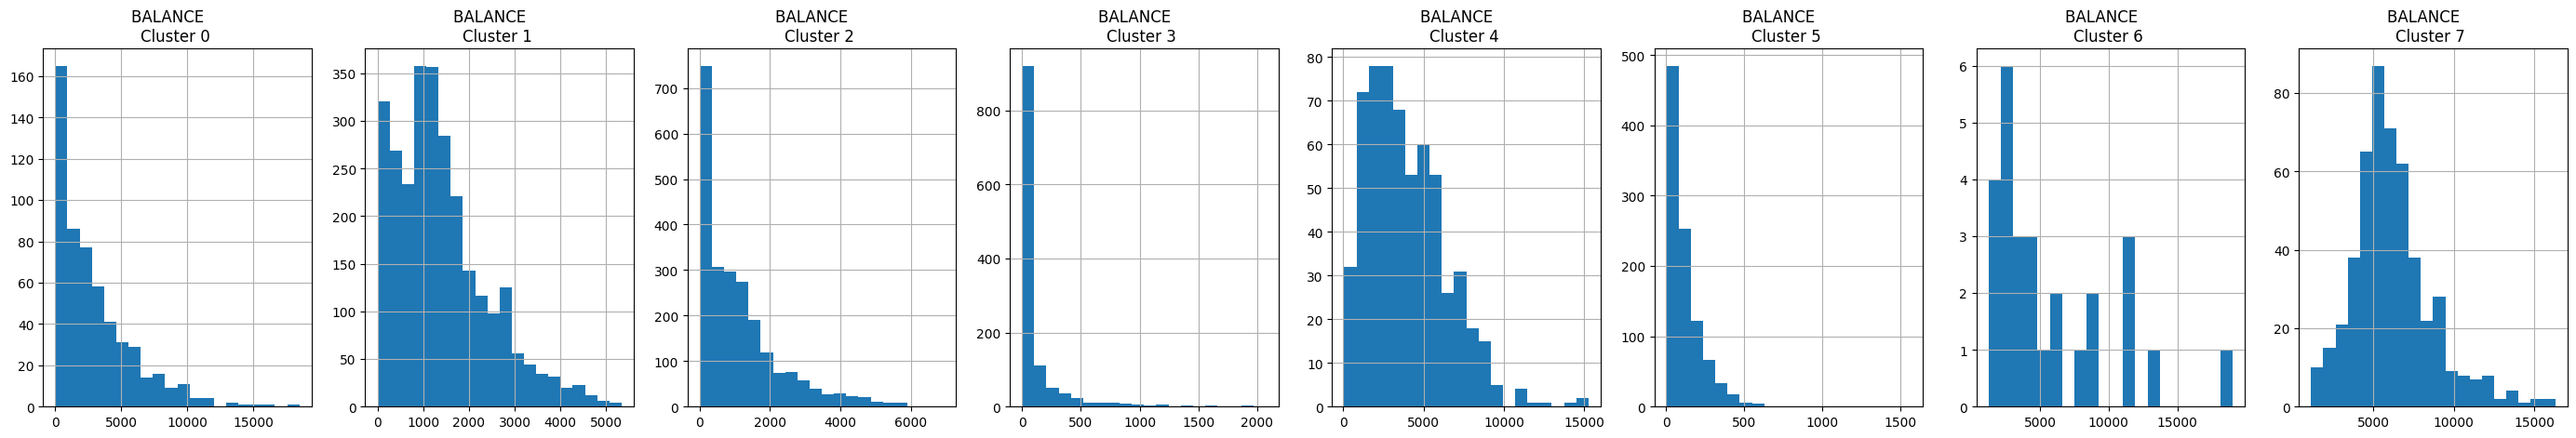

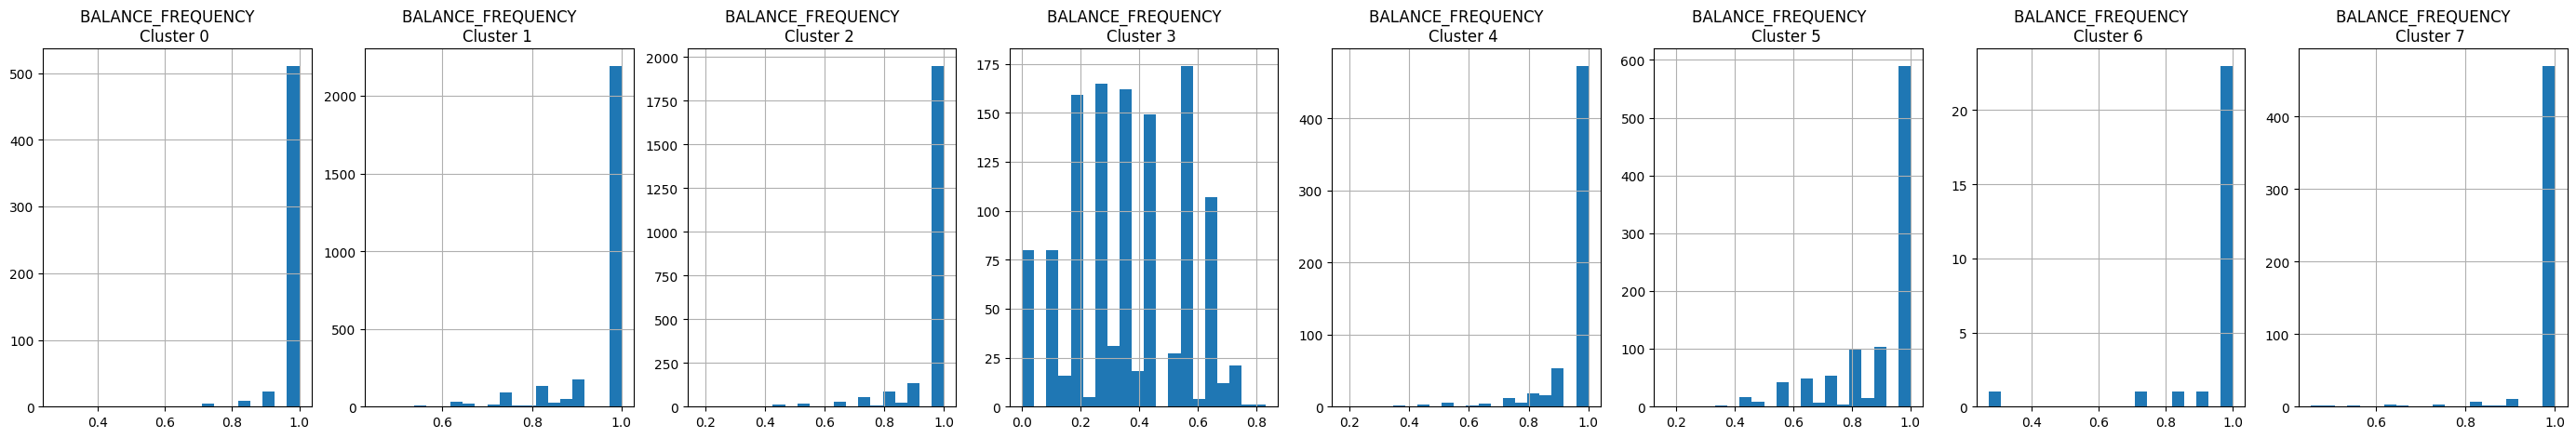

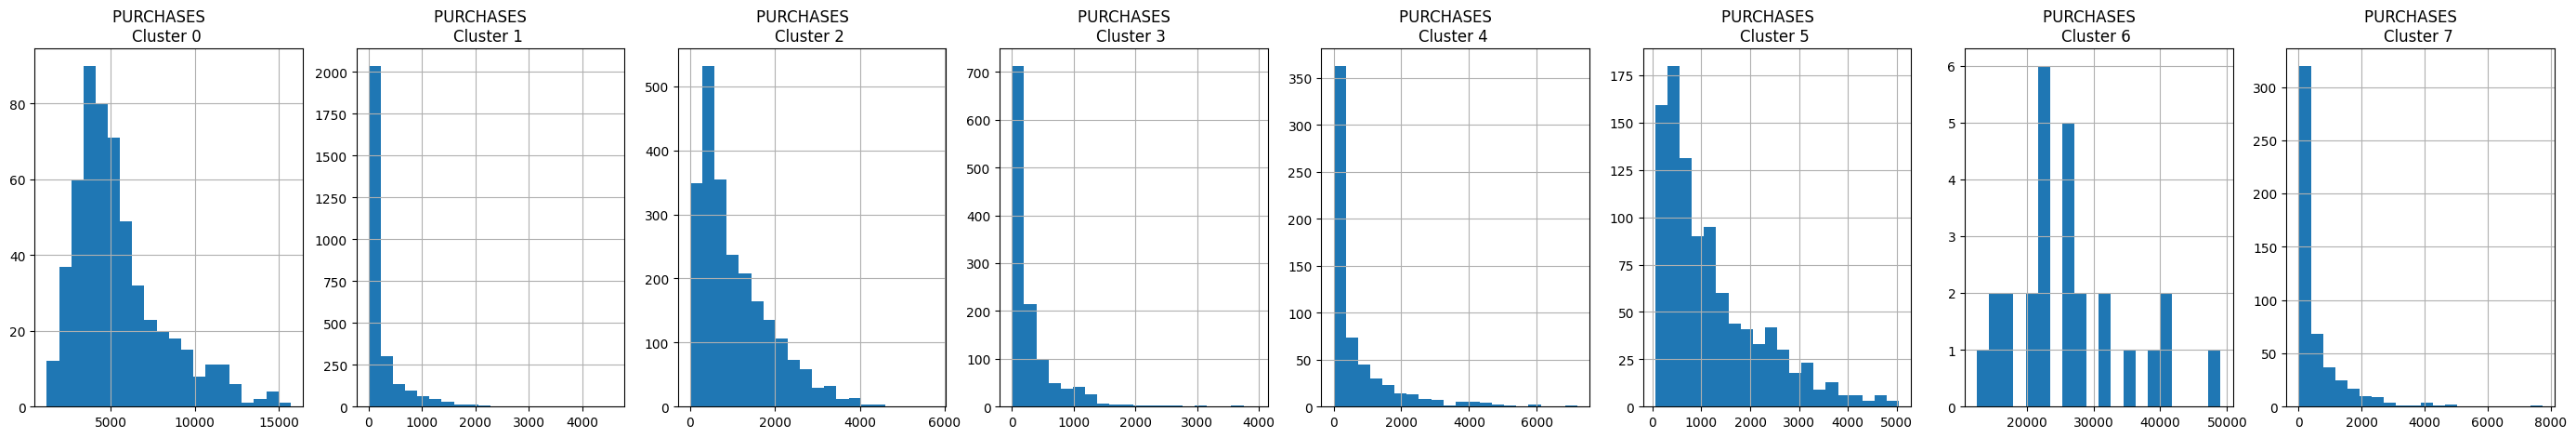

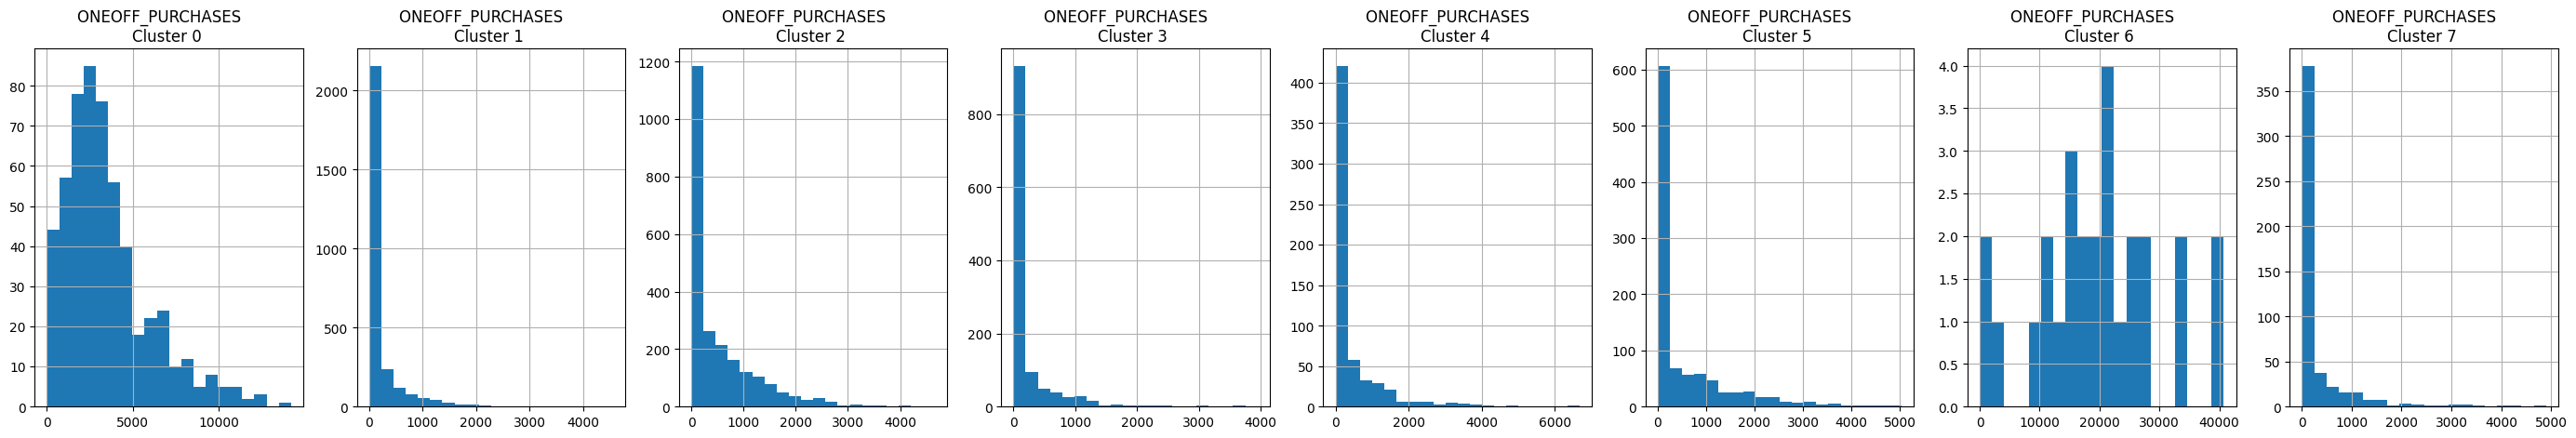

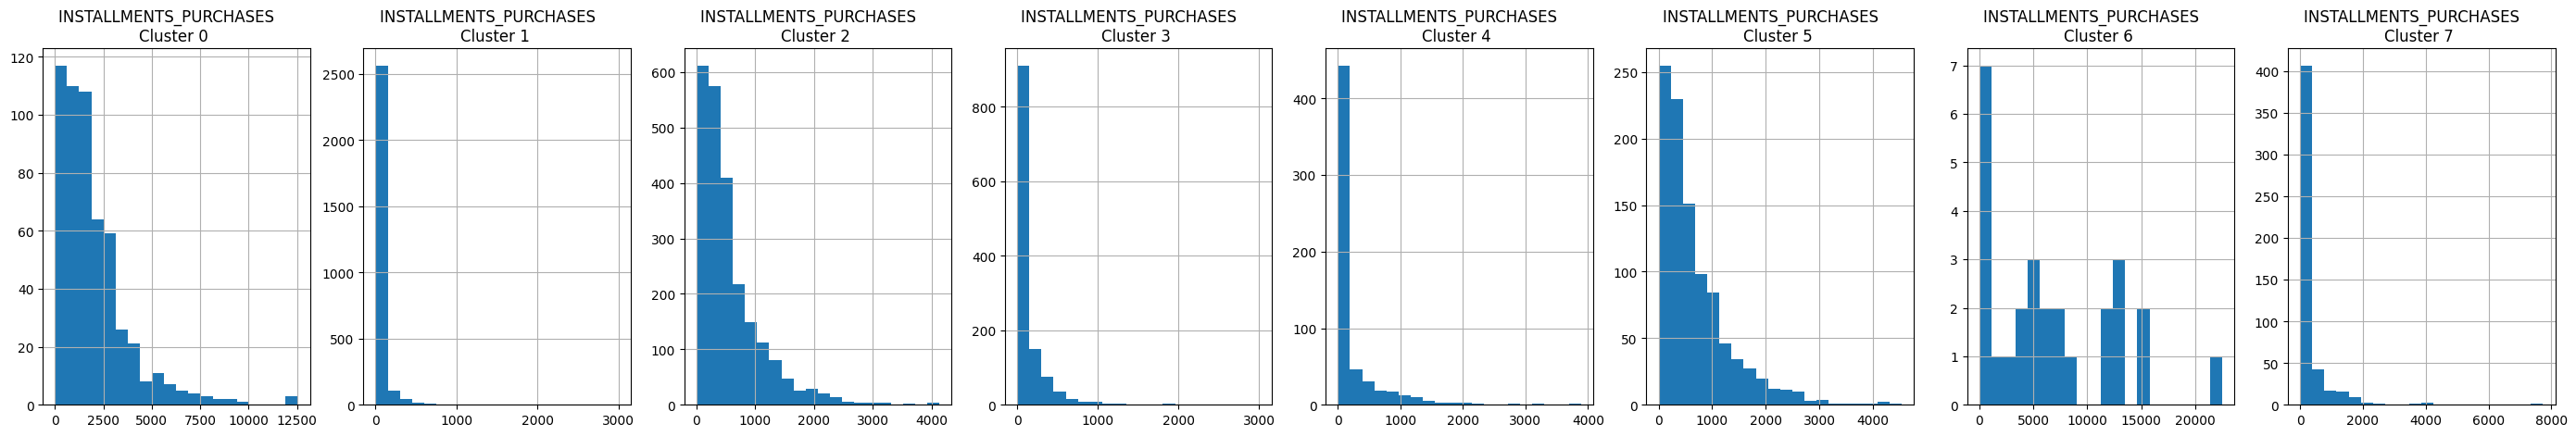

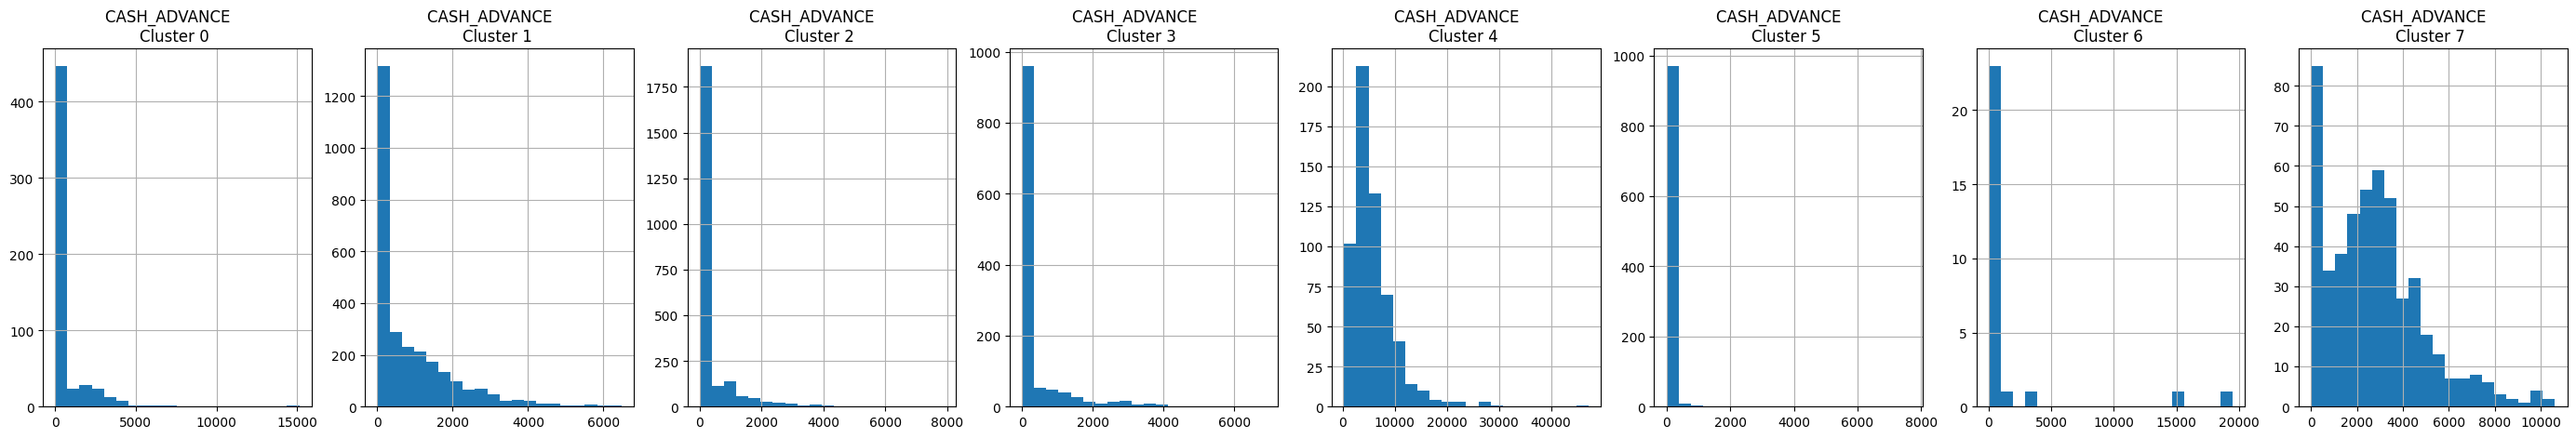

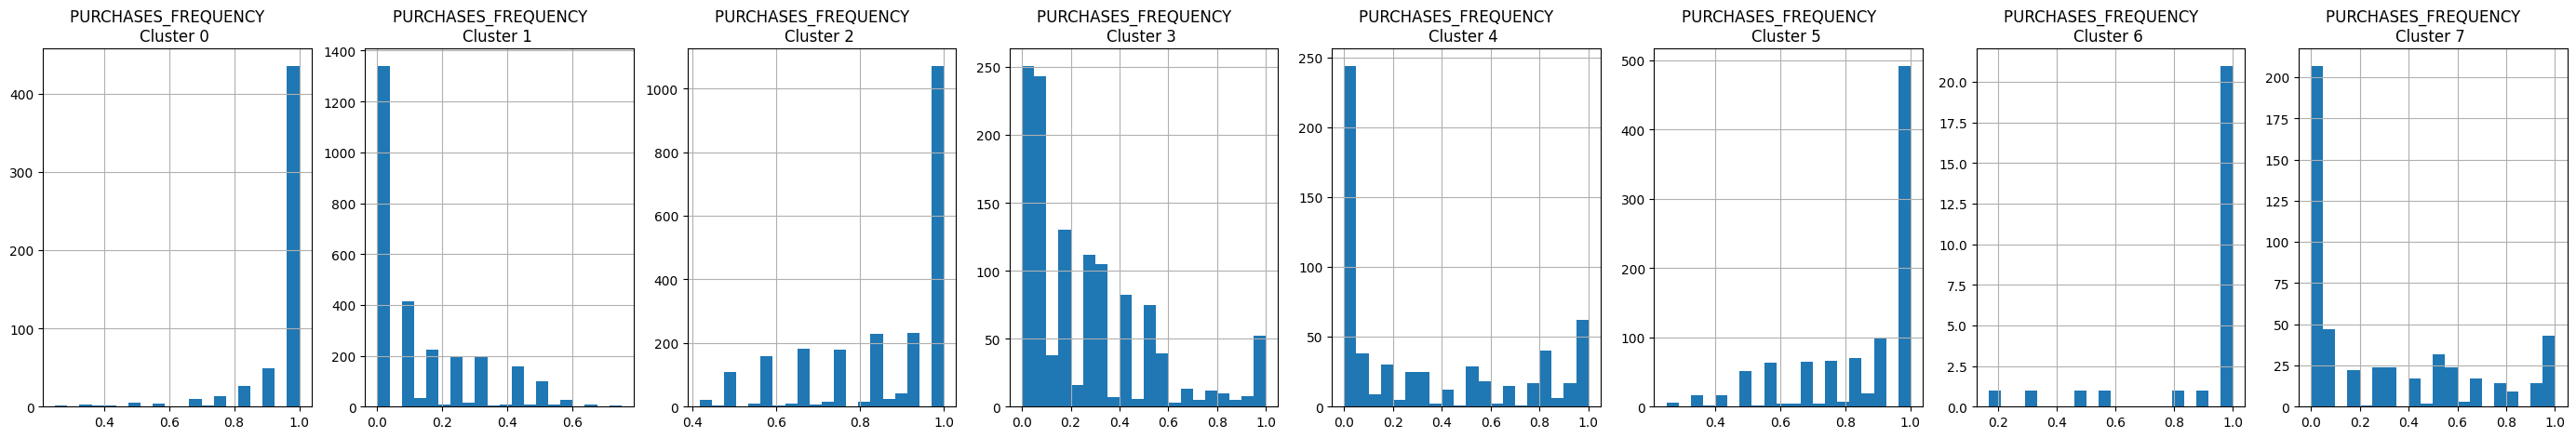

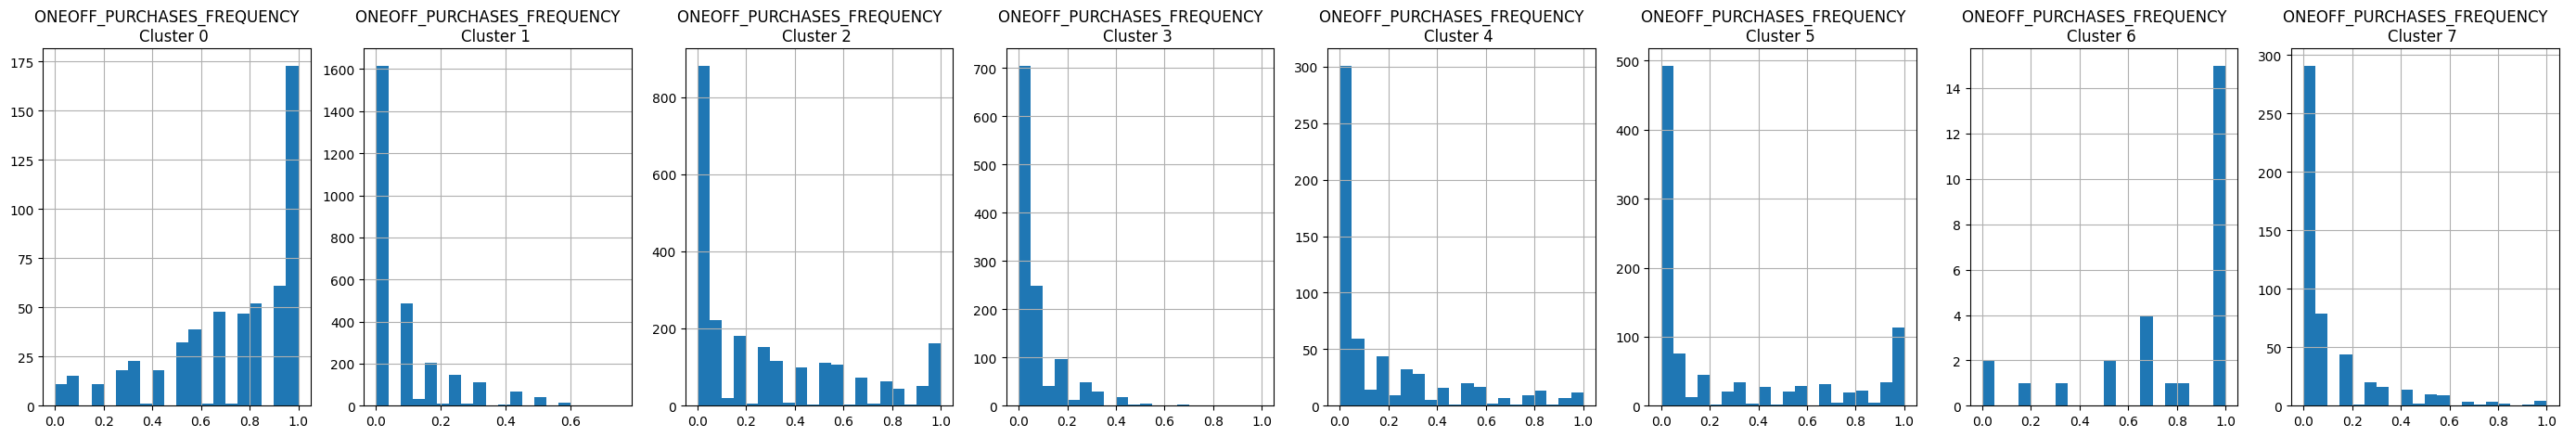

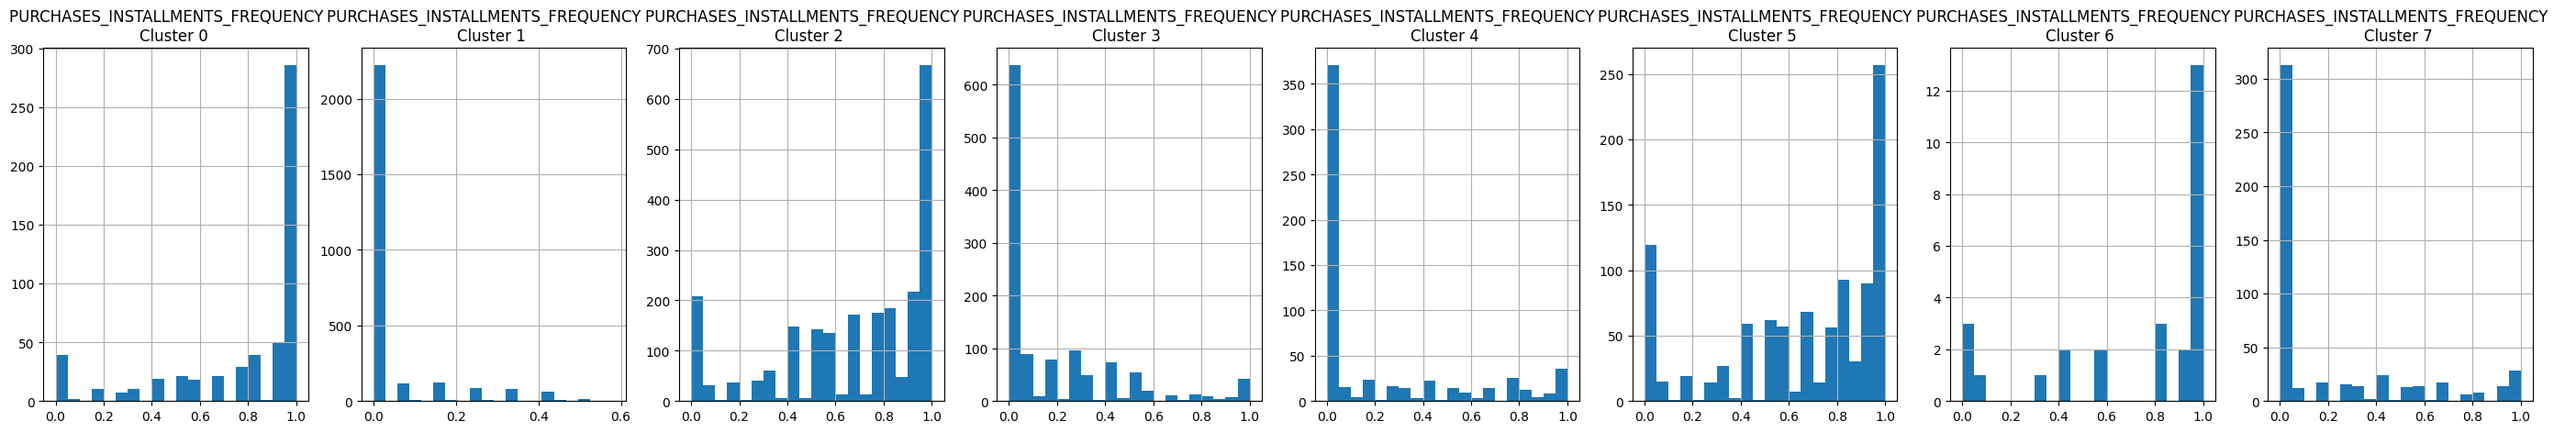

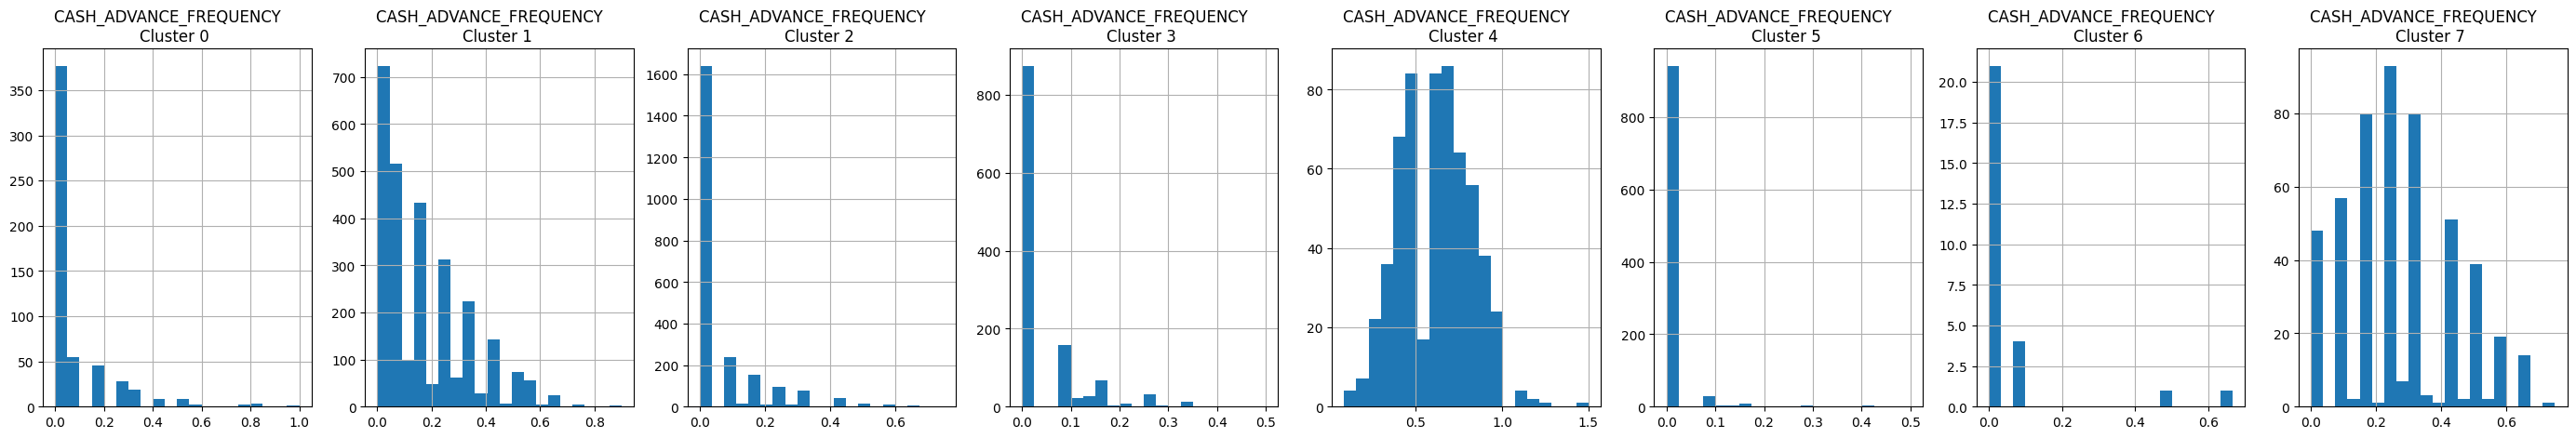

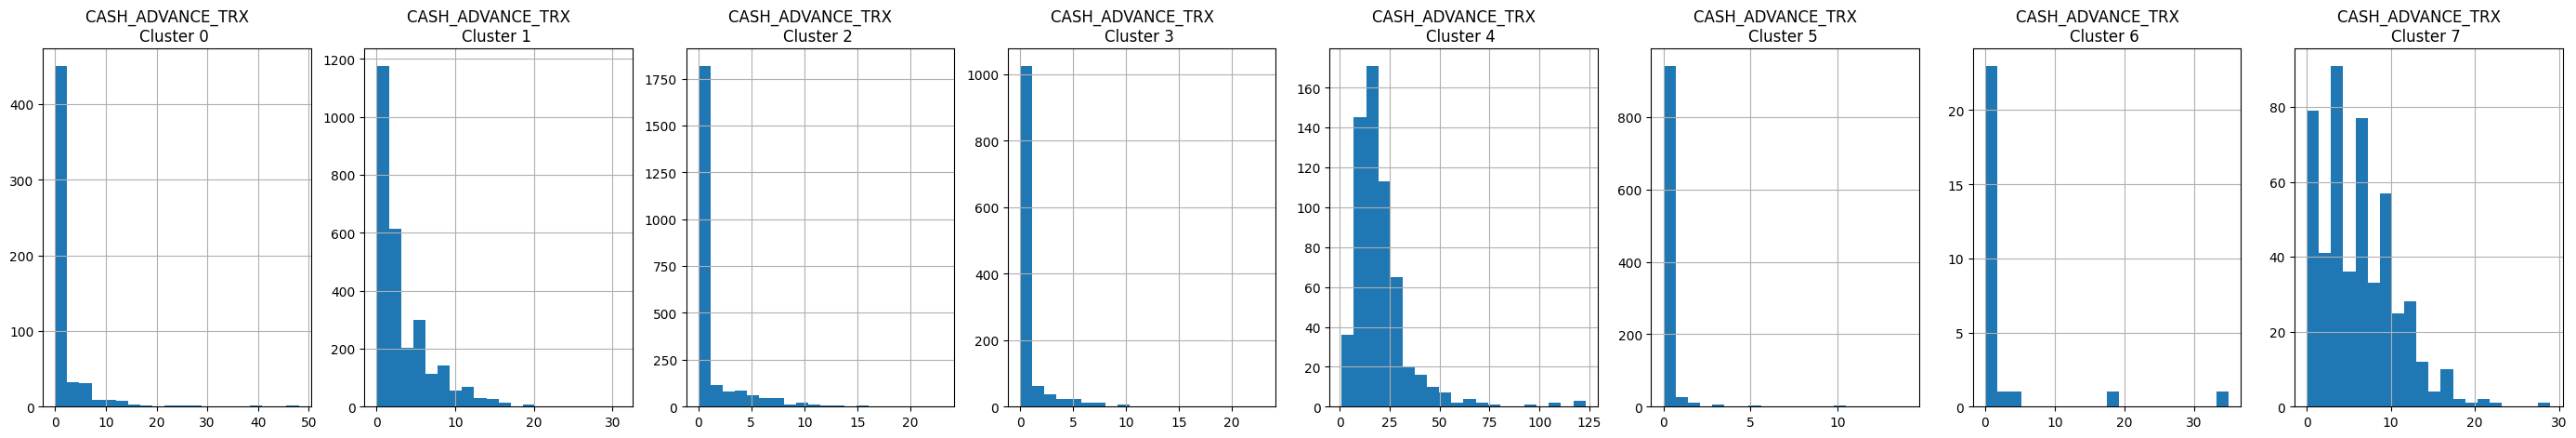

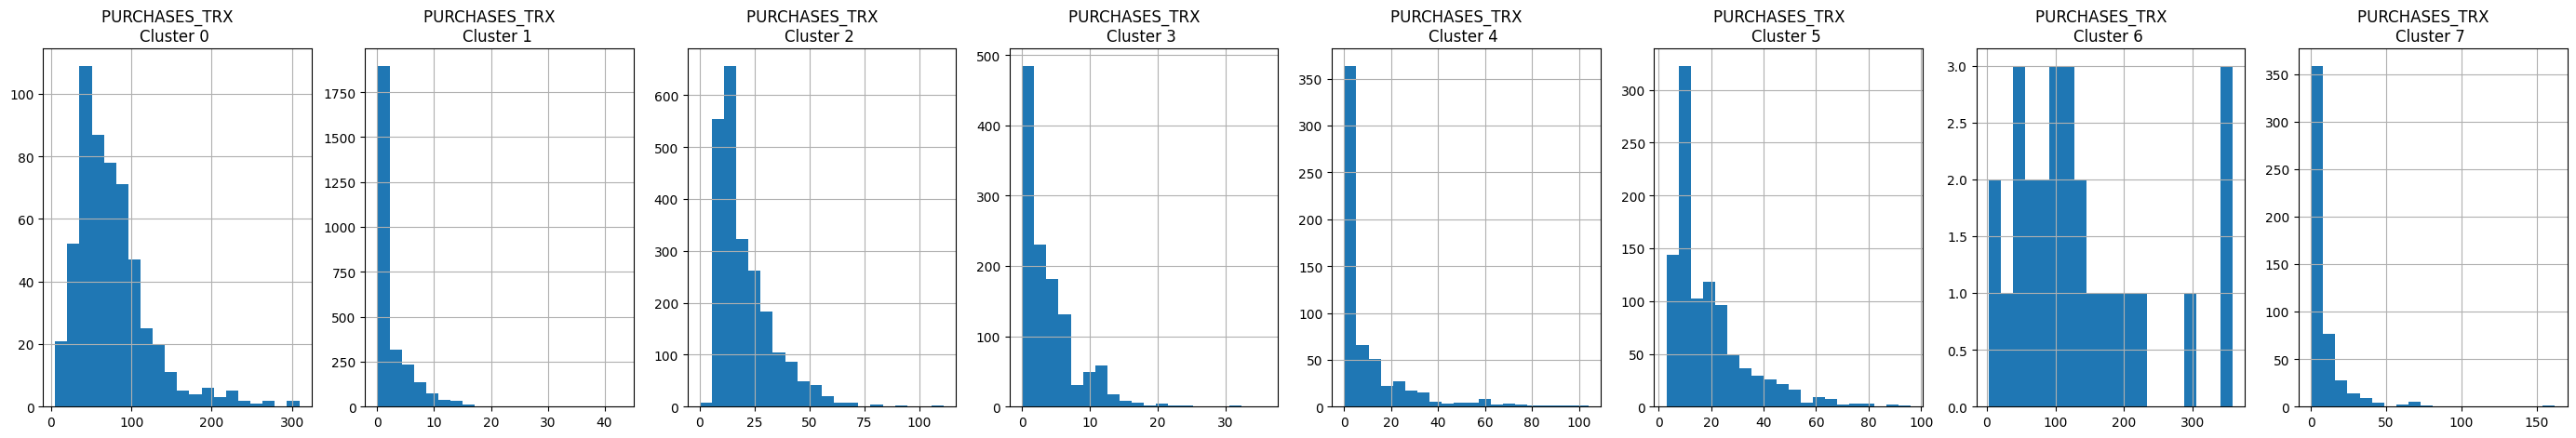

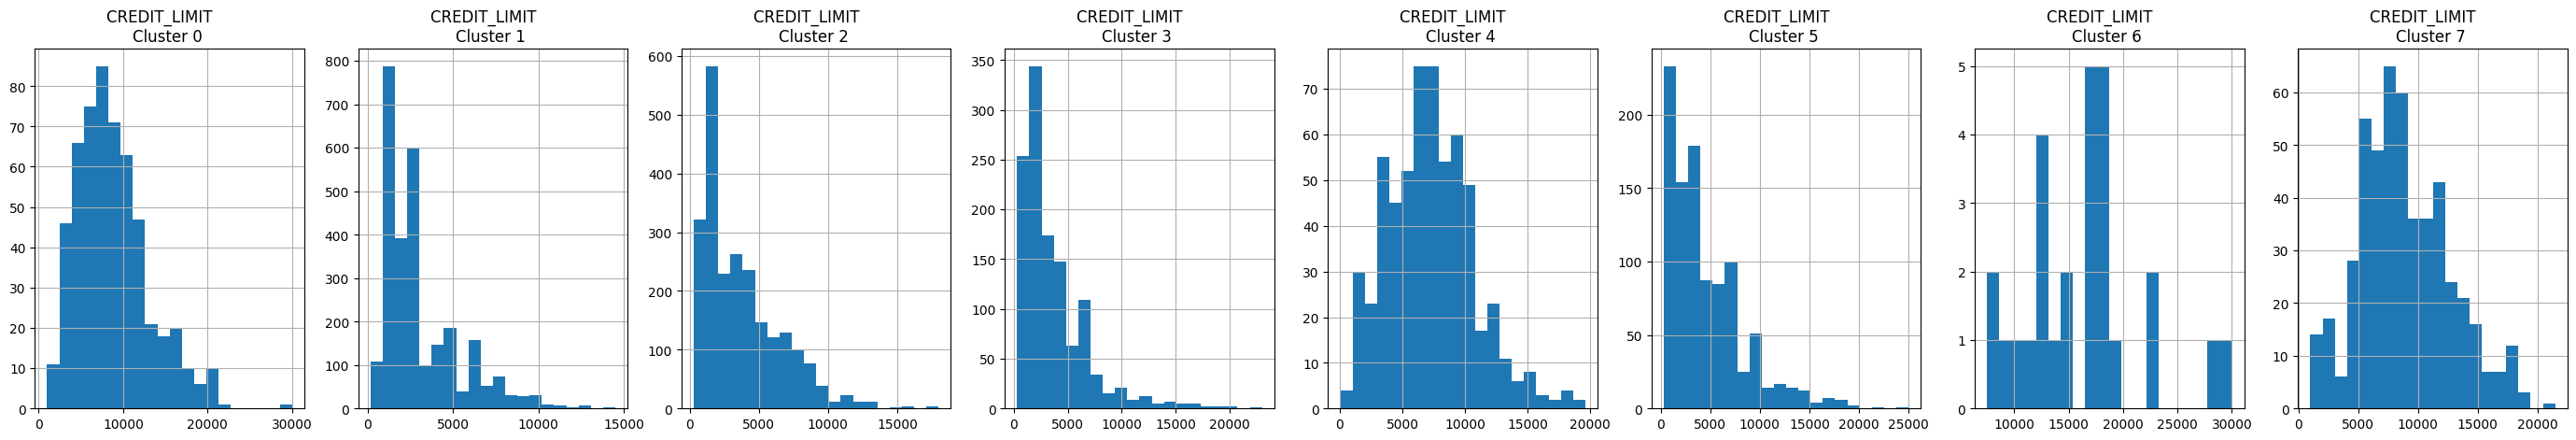

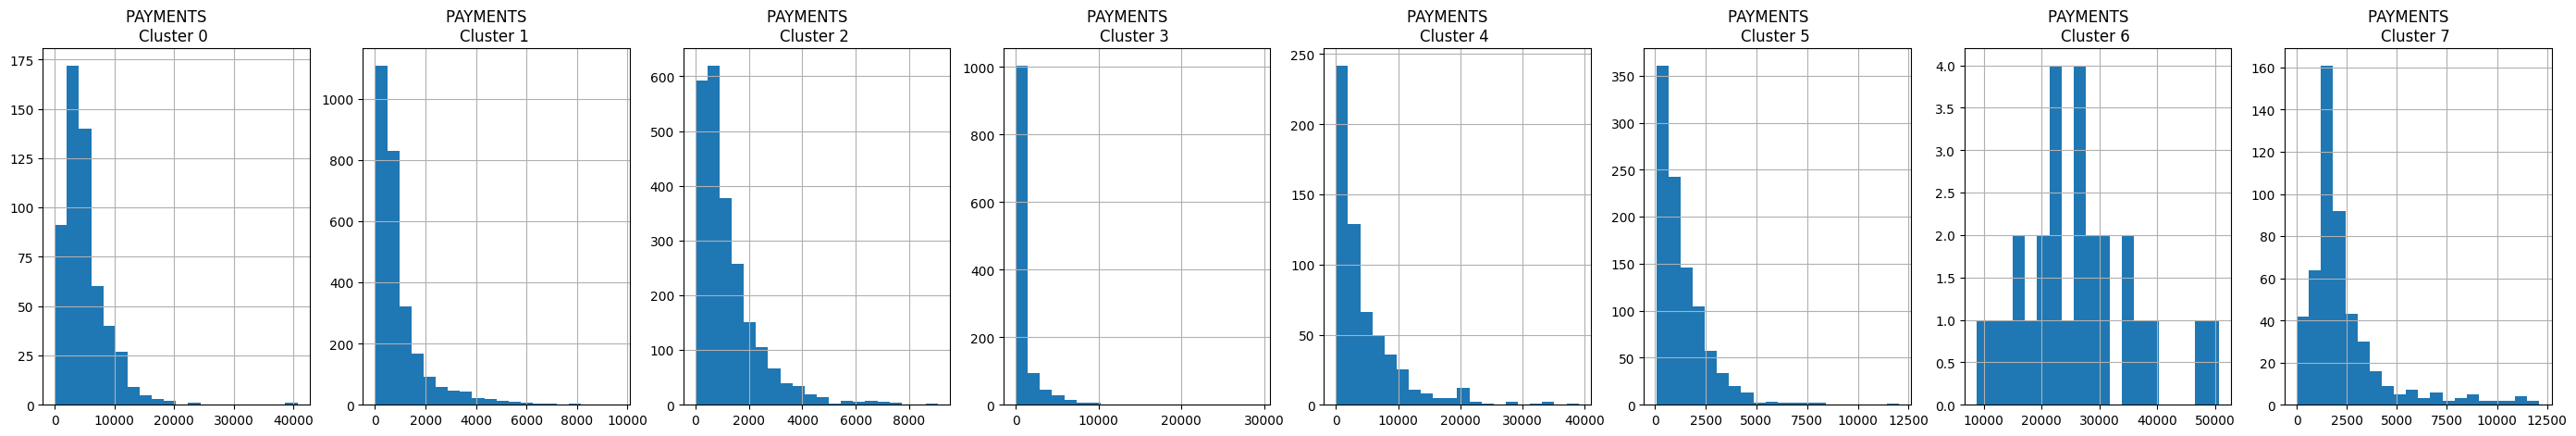

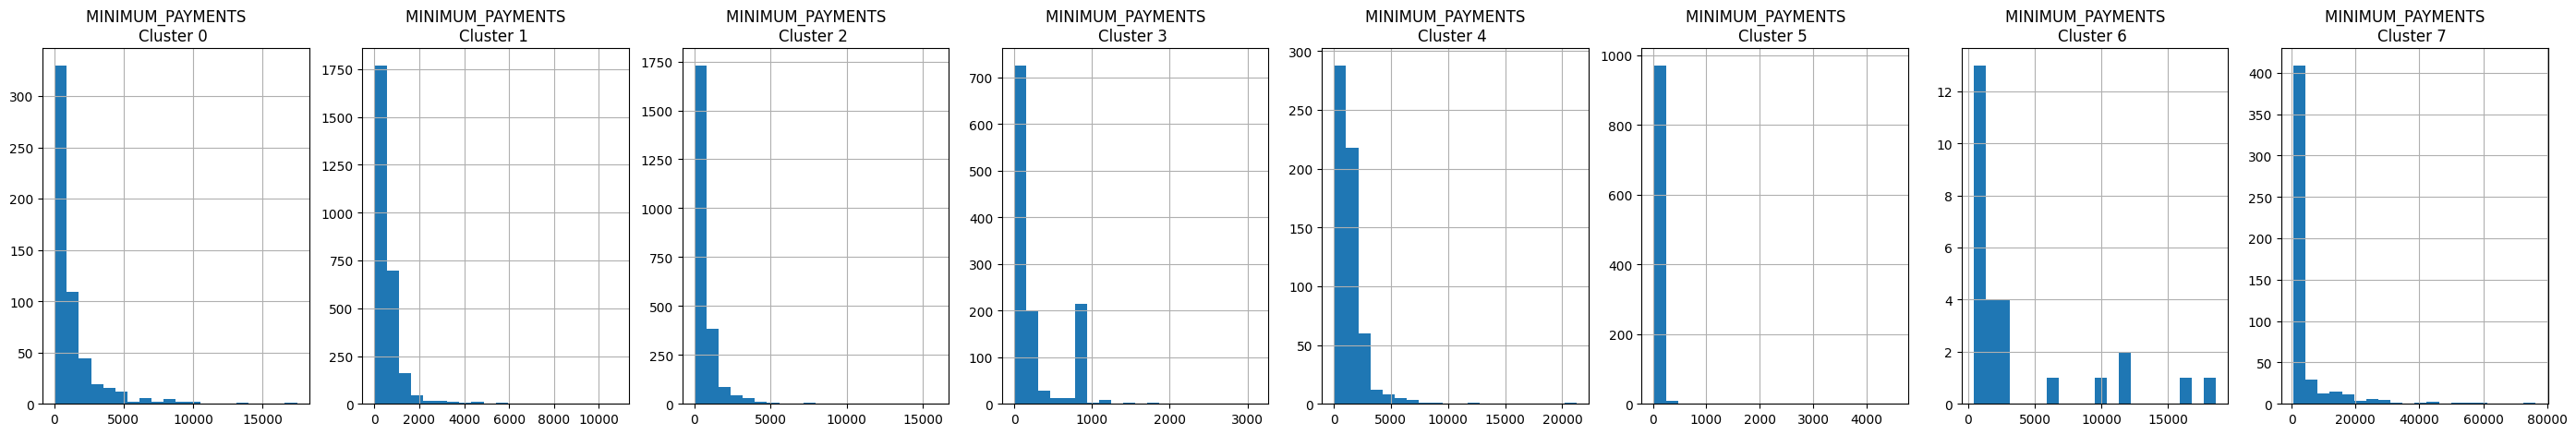

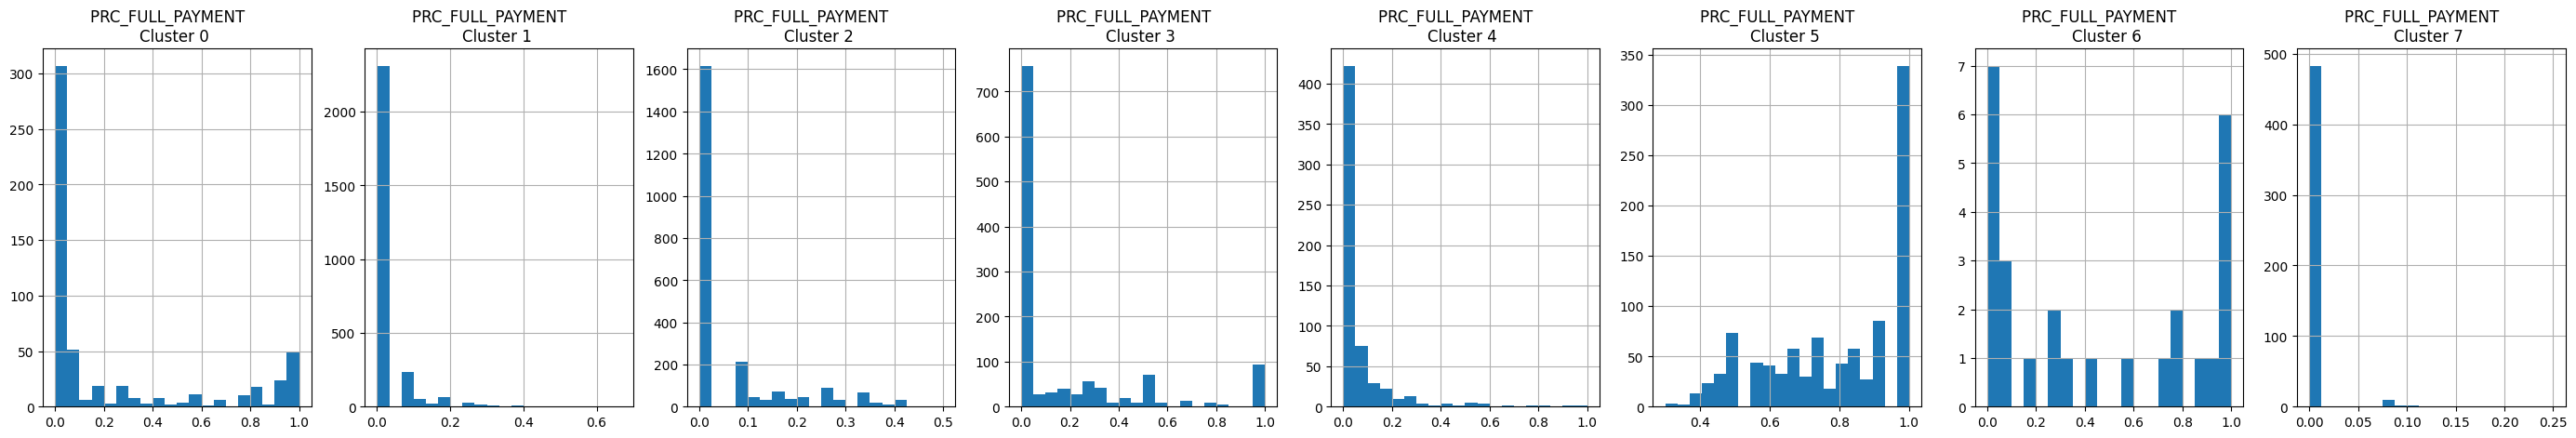

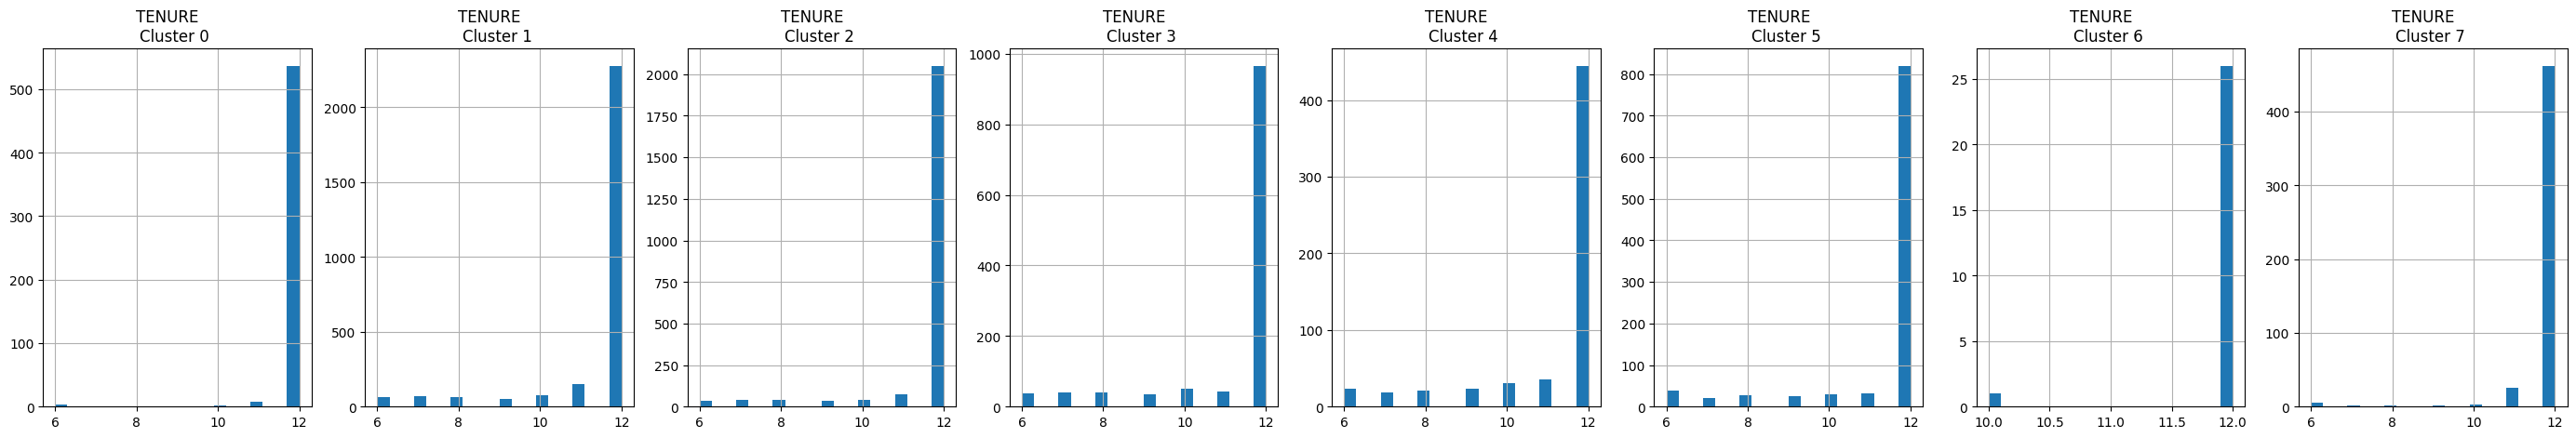

In [18]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

<h2>Applying PCA</h2>

In [19]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)

In [20]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])

In [21]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)

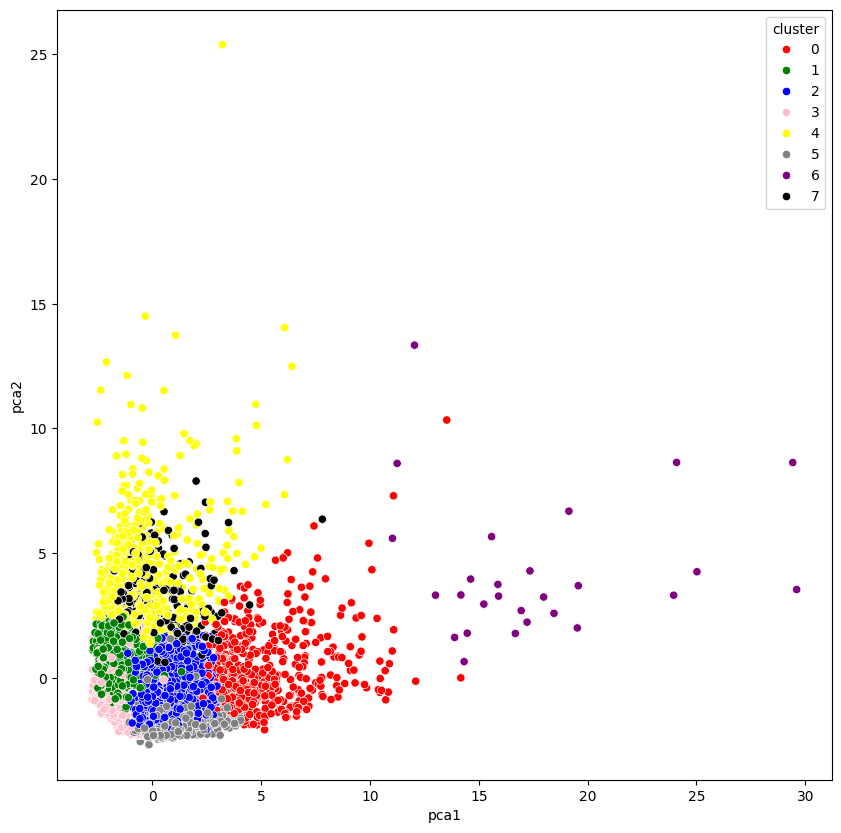

In [22]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

<h1>Apply Autoencoders</h1>